In [2]:
import pandas as pd
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso

## Reading in Data

Basic beginnings, reading in both the train and test sets. Additionally, I took the 'SalePrice' column out of the `train` dataframe and set it as its own series, namely `target`.

This makes it so `train` and `test` are identical in columns/features.

In [3]:
train = pd.read_csv("C:/Users/GuillermoGutierrez/Documents/Kaggle/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("C:/Users/GuillermoGutierrez/Documents/Kaggle/house-prices-advanced-regression-techniques/test.csv")
target = train['SalePrice']
train.drop(labels='SalePrice', axis=1, inplace=True)

Below, I've set the max amount of columns to display to 200 just for ease of use.

In [4]:
pd.set_option('display.max_columns', 200)
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,

## Exploring and Cleaning Data

Since I've gone through this data a few times, I've already identified some features which don't seem to be helpful when predicting SalePrice. Also, some of the features below represent redundant features, i.e. those that seem to explain the same thing as another feature (**GarageCars** vs. **GarageArea**)

I begin by dropping all those columns from both the `train` and `test` sets. Every clearning step that I do to the `train` set I mirror to the `test` so that they're consistent. 

In [5]:
columns_to_drop = ['Id', 'Alley', 'ExterCond', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'GarageType', 'GarageYrBlt', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Heating', 'SaleCondition', 'LotFrontage', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', '3SsnPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'Utilities', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'GarageFinish', 'LotArea', 'BsmtFullBath', 'HalfBath', 'EnclosedPorch', 'ScreenPorch', 'Foundation', 'CentralAir', 'PavedDrive', 'SaleType', 'MasVnrType']
train.drop(labels=columns_to_drop, axis=1, inplace=True)
test.drop(labels=columns_to_drop, axis=1, inplace=True)

Verifying that all the columns are still the same between the two datasets. 

In [6]:
(train.columns == test.columns).all()

True

Below are the columns/features I'm left to work with:

In [7]:
train.columns

Index(['MSSubClass', 'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF'],
      dtype='object')

Next, I want to see how many `np.nan` values are contained within each of the columns in the `train` set. The `DataFrame.count()` method allows me to count the values not equal to `np.nan`, and since I know I have 1460 training examples (rows) in the `train` set, I can see any value lower than 1460 indicates the presence of `np.nan`s. 

Since `DataFrame.count()` returns a `pd.Series` object, the `Series.to_frame()` method converts in back to a `pd.DataFrame` object with each columns' real number counts as its rows. Using the `DataFrame.T` attribute of that object gives me the transpose of the dataframe, thereby returning a better view of each column and its associated real number counts. 

In [8]:
train.count().to_frame().T

,MSSubClass,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF
0,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1460,1460,1460,1460,1460


In [9]:
train['MasVnrArea'].replace(to_replace={np.nan: 0}, inplace=True)
test['MasVnrArea'].replace(to_replace={np.nan: 0}, inplace=True)

Now to check our real value counts once again and find other columns needing to be cleaned. There aren't many so I'll just gloss over this part since its a bit repetitive. Also, note that for each column I clean, I consult with the `data_description.txt` file to see if there is an exisiting value for the column which should cover `np.nan` values. If one such value doesn't exist, then I create a new value and call it 'None'.

In [10]:
train.count().to_frame().T

,MSSubClass,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF
0,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460


## Feature Encoding

The next step in my process has been to encode certain features so as to make them accessible to the regression models I want to use later on. In order to do this, I've gone ahead and separated allmy features into three columns: categorical variables (`cat_vars`), ordinal variables (`ord_vars`), and numerical variables (`num_vars`).

In [11]:
cat_vars = ['MSSubClass', 'Neighborhood']
num_vars = ['OverallQual', 'OverallCond', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF']

Now to do the same thing with categorical variables.

In [12]:
train[cat_vars].head(10)

,MSSubClass,Neighborhood
0,60,CollgCr
1,20,Veenker
2,60,CollgCr
3,70,Crawfor
4,60,NoRidge
5,50,Mitchel
6,20,Somerst
7,60,NWAmes
8,50,OldTown
9,190,BrkSide


In [13]:
for column in cat_vars:
    if not (set(train[column].values) == set(test[column].values)):
        print(column)

MSSubClass


In [14]:
set(train['MSSubClass'].values), set(test['MSSubClass'].values)

({20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180, 190},
 {20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190})

In [15]:
for column in cat_vars:
    train = train.join(pd.get_dummies(train[column], prefix=f'{column}_', drop_first=True))
    train.drop(labels=column, axis=1, inplace=True)
    if column == 'MSSubClass':
        train.insert(train.columns.get_loc('MSSubClass__160'), 'MSSubClass__150', 0)
    test = test.join(pd.get_dummies(test[column], prefix=f'{column}_', drop_first=True))
    test.drop(labels=column, axis=1, inplace=True)

In [16]:
train.head(10)

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__150,MSSubClass__160,MSSubClass__180,MSSubClass__190,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker
0,7,5,2003,2003,196.0,856,1710,2,8,0,2,0,61,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,8,1976,1976,0.0,1262,1262,2,6,1,2,298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,7,5,2001,2002,162.0,920,1786,2,6,1,2,0,42,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7,5,1915,1970,0.0,756,1717,1,7,1,3,0,35,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,5,2000,2000,350.0,1145,2198,2,9,1,3,192,84,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,5,5,1993,1995,0.0,796,1362,1,5,0,2,40,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,8,5,2004,2005,186.0,1686,1694,2,7,1,2,255,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,7,6,1973,1973,240.0,1107,2090,2,7,2,2,235,204,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,7,5,1931,1950,0.0,952,1774,2,8,2,2,90,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,5,6,1939,1950,0.0,991,1077,1,5,2,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
l2_train = train.copy()
l2_test = test.copy()
for column in num_vars:
    train_series = (l2_train[column] - l2_train[column].mean()) / np.sqrt(sum(l2_train[column].to_numpy(dtype=np.float64)**2))
    test_series = (l2_test[column] - l2_test[column].mean()) / np.sqrt(sum(l2_test[column].to_numpy(dtype=np.float64)**2))
    l2_train[column] = train_series
    l2_test[column] = test_series

In [18]:
l2_train.head(10)

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__150,MSSubClass__160,MSSubClass__180,MSSubClass__190,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker
0,0.003769,-0.002649,0.000421,0.000239,0.011685,-0.004605,0.003174,0.006861,0.005775,-0.018038,0.003177,-0.015732,0.004632,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.000416,0.011162,0.000063,-0.000117,-0.012973,0.004677,-0.004136,0.006861,-0.002017,0.011387,0.003177,0.034012,-0.015073,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.003769,-0.002649,0.000395,0.000226,0.007408,-0.003142,0.004414,0.006861,-0.002017,0.011387,0.003177,-0.015732,-0.001505,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.003769,-0.002649,-0.000747,-0.000196,-0.012973,-0.006891,0.003288,-0.008913,0.001879,0.011387,0.016818,-0.015732,-0.003767,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.007954,-0.002649,0.000381,0.000200,0.031060,0.002002,0.011137,0.006861,0.009671,0.011387,0.016818,0.016318,0.012062,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,-0.004600,-0.002649,0.000288,0.000134,-0.012973,-0.005977,-0.002504,-0.008913,-0.005914,-0.018038,0.003177,-0.009055,-0.005382,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0.007954,-0.002649,0.000435,0.000265,0.010427,0.014370,0.002913,0.006861,0.001879,0.011387,0.003177,0.026834,0.003340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,0.003769,0.001955,0.000023,-0.000156,0.017221,0.001133,0.009375,0.006861,0.001879,0.040811,0.003177,0.023496,0.050825,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0.003769,-0.002649,-0.000535,-0.000460,-0.012973,-0.002410,0.004219,0.006861,0.005775,0.040811,0.003177,-0.000709,-0.015073,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,-0.004600,0.001955,-0.000428,-0.000460,-0.012973,-0.001519,-0.007154,-0.008913,-0.005914,0.040811,-0.010464,-0.015732,-0.013780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
norm_train = train.copy()
norm_test = test.copy()
for column in num_vars:
    train_series = (norm_train[column] - norm_train[column].mean()) / norm_train[column].std()
    test_series = (norm_test[column] - norm_test[column].mean()) / norm_test[column].std()
    norm_train[column] = train_series
    norm_test[column] = test_series

In [20]:
norm_train.head(10)

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__150,MSSubClass__160,MSSubClass__180,MSSubClass__190,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker
0,0.651256,-0.517023,1.050634,0.878367,0.513928,-0.459145,0.370207,0.789470,0.911897,-0.950901,0.311618,-0.751918,0.216429,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.071812,2.178881,0.156680,-0.429430,-0.570555,0.466305,-0.482347,0.789470,-0.318574,0.600289,0.311618,1.625638,-0.704242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.651256,-0.517023,0.984415,0.829930,0.325803,-0.313261,0.514836,0.789470,-0.318574,0.600289,0.311618,-0.751918,-0.070337,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.651256,-0.517023,-1.862993,-0.720051,-0.570555,-0.687089,0.383528,-1.025689,0.296662,0.600289,1.649742,-0.751918,-0.175988,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.374324,-0.517023,0.951306,0.733056,1.366021,0.199611,1.298881,0.789470,1.527133,0.600289,1.649742,0.779930,0.563567,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,-0.794879,-0.517023,0.719540,0.490872,-0.570555,-0.595911,-0.292045,-1.025689,-0.933810,-0.950901,0.311618,-0.432783,-0.251453,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1.374324,-0.517023,1.083743,0.975241,0.458597,1.432785,0.339758,0.789470,0.296662,0.600289,0.311618,1.282568,0.156057,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,0.651256,0.381612,0.057352,-0.574741,0.757383,0.112993,1.093354,0.789470,0.296662,2.151479,0.311618,1.123000,2.374723,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0.651256,-0.517023,-1.333243,-1.688790,-0.570555,-0.240320,0.492000,0.789470,0.911897,2.151479,0.311618,-0.033864,-0.704242,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,-0.794879,0.381612,-1.068368,-1.688790,-0.570555,-0.151422,-0.834405,-1.025689,-0.933810,2.151479,-1.026506,-0.751918,-0.643870,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
train.insert(0, 'x0', 1)
norm_train.insert(0, 'x0', 1)
test.insert(0, 'x0', 1)
norm_test.insert(0, 'x0', 1)

In [22]:
l2_train.insert(0, 'x0', 1)
l2_test.insert(0, 'x0', 1)

## Linear Regression

In [23]:
train_mat = train[:1000].to_numpy(dtype=np.float64)
validate_mat = train[1000:].to_numpy(dtype=np.float64)

norm_train_mat = norm_train[:1000].to_numpy(dtype=np.float64)
norm_validate_mat = norm_train[1000:].to_numpy(dtype=np.float64)

l2_train_mat = l2_train[:1000].to_numpy(dtype=np.float64)
l2_validate_mat = l2_train[1000:].to_numpy(dtype=np.float64)

In [24]:
tar_mat = target[:1000].to_numpy(dtype=np.float64).reshape(len(target[:1000]),1)
val_tar_mat = target[1000:].to_numpy(dtype=np.float64).reshape(len(target[1000:]),1)

In [26]:
theta_mat = np.matmul(np.matmul(la.pinv(np.matmul(train_mat.T, train_mat)), train_mat.T), np.log(tar_mat))
norm_theta_mat = np.matmul(np.matmul(la.pinv(np.matmul(norm_train_mat.T, norm_train_mat)), norm_train_mat.T), np.log(tar_mat))
l2_theta_mat = np.matmul(np.matmul(la.pinv(np.matmul(l2_train_mat.T, l2_train_mat)), l2_train_mat.T), np.log(tar_mat))

In [27]:
pred_mat = np.matmul(validate_mat, theta_mat)
norm_pred_mat = np.matmul(norm_validate_mat, norm_theta_mat)
l2_pred_mat = np.matmul(l2_validate_mat, l2_theta_mat)

In [28]:
{'No Changes': np.sqrt(np.sum((pred_mat-np.log(val_tar_mat))**2)/len(val_tar_mat)),
 'Regularized': np.sqrt(np.sum((norm_pred_mat-np.log(val_tar_mat))**2)/len(val_tar_mat)),
 'L2 Normalized': np.sqrt(np.sum((l2_pred_mat-np.log(val_tar_mat))**2)/len(val_tar_mat))}

{'No Changes': 0.15495457412215966,
 'Regularized': 0.15495457464573337,
 'L2 Normalized': 0.1549545746456365}

In [29]:
sk_linreg = LinearRegression(normalize=False)
sk_linreg.fit(train_mat, np.log(tar_mat))
np.sqrt(np.sum((sk_linreg.predict(validate_mat)-np.log(val_tar_mat))**2)/len(val_tar_mat))

0.15495457464575155

In [30]:
norm_sk_linreg = LinearRegression(normalize=True)
norm_sk_linreg.fit(train_mat, np.log(tar_mat))
np.sqrt(np.sum((norm_sk_linreg.predict(validate_mat)-np.log(val_tar_mat))**2)/len(val_tar_mat))

0.15494469616373063

## Ridge Regression

In [43]:
my_calcs = []
my_norm_calcs = []
l2_norm_calcs = []
sk_calcs = []
norm_sk_calcs = []
for lmbda in np.arange(0, 1, 0.001):
    
    ridge_thetas = np.matmul(np.matmul(la.pinv(np.matmul(train_mat.T, train_mat) + lmbda*np.identity(len(train.columns))), train_mat.T), np.log(tar_mat))
    pred_mat = np.matmul(validate_mat, ridge_thetas)
    my_calcs.append(np.sqrt(np.sum((pred_mat-np.log(val_tar_mat))**2)/len(val_tar_mat)))
    
    norm_ridge_thetas = np.matmul(np.matmul(la.pinv(np.matmul(norm_train_mat.T, norm_train_mat) + lmbda*np.identity(len(norm_train.columns))), norm_train_mat.T), np.log(tar_mat))
    norm_pred_mat = np.matmul(norm_validate_mat, norm_ridge_thetas)
    my_norm_calcs.append(np.sqrt(np.sum((norm_pred_mat-np.log(val_tar_mat))**2)/len(val_tar_mat)))
    
    l2_ridge_thetas = np.matmul(np.matmul(la.pinv(np.matmul(l2_train_mat.T, l2_train_mat) + lmbda*np.identity(len(l2_train.columns))), l2_train_mat.T), np.log(tar_mat))
    l2_pred_mat = np.matmul(l2_validate_mat, l2_ridge_thetas)
    l2_norm_calcs.append(np.sqrt(np.sum((l2_pred_mat-np.log(val_tar_mat))**2)/len(val_tar_mat)))
    
    sk_ridge = Ridge(alpha=lmbda, normalize=False)
    sk_ridge.fit(train_mat, np.log(tar_mat))
    sk_calcs.append(np.sqrt(np.sum((sk_ridge.predict(validate_mat)-np.log(val_tar_mat))**2)/len(val_tar_mat)))
    
    norm_sk_ridge = Ridge(alpha=lmbda, normalize=True)
    norm_sk_ridge.fit(train_mat, np.log(tar_mat))
    norm_sk_calcs.append(np.sqrt(np.sum((norm_sk_ridge.predict(validate_mat)-np.log(val_tar_mat))**2)/len(val_tar_mat)))

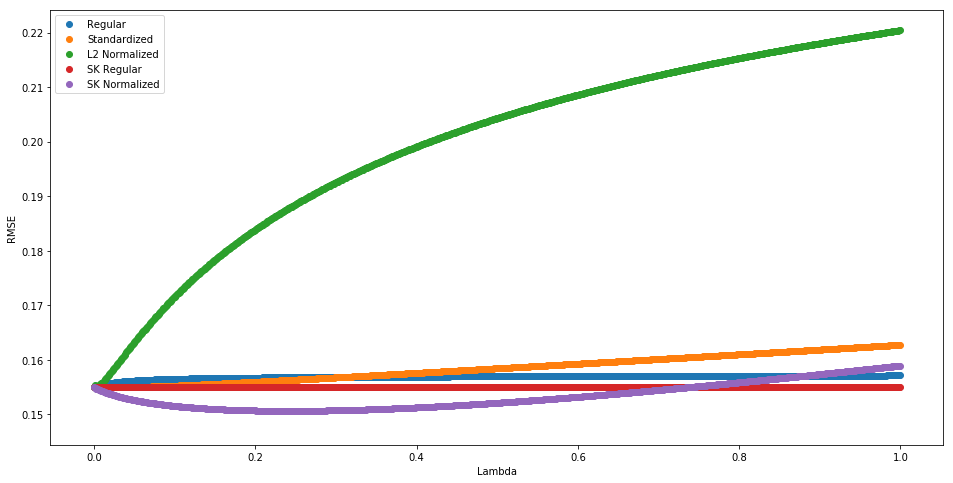

In [44]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(np.arange(0, 1, 0.001), my_calcs, label='Regular')
ax.scatter(np.arange(0, 1, 0.001), my_norm_calcs, label='Standardized')
ax.scatter(np.arange(0, 1, 0.001), l2_norm_calcs, label='L2 Normalized')
ax.scatter(np.arange(0, 1, 0.001), sk_calcs, label = 'SK Regular')
ax.scatter(np.arange(0, 1, 0.001), norm_sk_calcs, label = 'SK Normalized')
ax.set_xlabel('Lambda')
ax.set_ylabel('RMSE')
ax.legend()
plt.show()

In [ ]:
lmbdas = np.arange(0, 5, 0.01)
lmbdas[my_calcs.index(min(my_calcs))], lmbdas[sk_calcs.index(min(sk_calcs))], lmbdas[norm_sk_calcs.index(min(norm_sk_calcs))]

## LASSO Regression 

In [ ]:
lambda_param = 100
lasso_thetas = np.matmul(np.matmul(la.pinv(np.matmul(train_mat.T, train_mat) + lambda_param*np.identity(112)), train_mat.T), tar_mat)

In [ ]:
pred_mat = np.matmul(validate_mat, ridge_thetas)

In [ ]:
pred_mat

In [ ]:
np.sqrt(np.sum((np.log(pred_mat)-np.log(val_tar_mat))**2)/len(val_tar_mat))

In [ ]:
sk_lasso = Lasso(alpha=lambda_param, normalize=True)
sk_lasso.fit(train_mat, np.log(tar_mat))
np.sqrt(np.sum((sk_lasso.predict(validate_mat).reshape(460,1)-np.log(val_tar_mat))**2)/len(val_tar_mat))

In [ ]:
my_calcs = []
sk_calcs = []
for lmbda in np.arange(1, 50, 1):
    
    lasso_thetas = np.matmul(np.matmul(la.pinv(np.matmul(train_mat.T, train_mat) + lmbda*np.identity(112)), train_mat.T), tar_mat)
    pred_mat = np.matmul(validate_mat, lasso_thetas)
    my_calcs.append(np.sqrt(np.sum((np.log(pred_mat)-np.log(val_tar_mat))**2)/len(val_tar_mat)))
    
    sk_lasso = Lasso(alpha=lmbda, normalize=False)
    sk_lasso.fit(train_mat, tar_mat)
    sk_calcs.append(np.sqrt(np.sum((np.log(sk_lasso.predict(validate_mat).reshape(460,1))-np.log(val_tar_mat))**2)/len(val_tar_mat)))

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(np.arange(1,50,1), my_calcs)
ax.scatter(np.arange(1,50,1), sk_calcs)
plt.show()